In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

AttributeError: module 'matplotlib' has no attribute 'get_data_path'

In [22]:
myPath = 'data'
for file in os.listdir(myPath):
    if file.endswith('.xlsx'):
        tempXlsx = pd.read_excel(os.path.join(myPath,file))
        newName = str(myPath+"/"+file[:-4]+'csv')
        tempXlsx.to_csv(newName, index = None, header = True)

In [23]:
mobi17DF = pd.read_csv('data/Mobi_System_Data_2017.csv')
mobi17DF

,Departure,Return,Account,Bike,Departure station,Return station,Membership type,Covered distance (m),Duration (sec.),Departure battery voltage (mV),Return battery voltage (mV),Departure temperature (°C),Return temperature (°C),Stopover duration (sec.),Number of stopovers
0,2018-01-01 00:00:00,2018-01-01 00:00:00,ID00001,754.0,0048 Comox & Broughton,0002 Burrard Station,365 Day Founding Plus,1382.0,402,3715,3903,2,4,0,0
1,2018-01-01 00:00:00,2018-01-01 00:00:00,ID00001,754.0,0048 Comox & Broughton,0048 Comox & Broughton,365 Day Founding Plus,0.0,17,3797,3861,2,1,0,0
2,2018-01-01 00:00:00,2018-01-01 00:00:00,ID00002,517.0,0093 Chilco & Robson,0035 Coal Harbour Community Centre,365 Day Founding Standard,1960.0,1015,3645,3795,0,1,0,0
3,2018-01-01 00:00:00,2018-01-01 00:00:00,ID00003,231.0,0071 14th & Granville,0211 14th & Alder,365 Corporate Plus,624.0,194,3650,3790,0,1,0,0
4,2018-01-01 00:00:00,2018-01-01 00:00:00,ID00004,1302.0,0187 Bute & Davie,0079 Nelson & Richards,365 Day Founding Plus,1756.0,571,3686,3868,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573701,2017-01-01 02:00:00,2017-01-01 02:00:00,ID00324,1130.0,0024 Hornby & Pender,0050 Bute & Comox,Archived Founding Plus,1696.0,639,3735,3866,4,5,0,0
573702,2017-01-01 02:00:00,2017-01-01 02:00:00,ID00918,139.0,0024 Hornby & Pender,0031 Morton & Denman,Archived Founding Standard,2822.0,966,3647,3848,4,6,0,0
573703,2017-01-01 01:00:00,2017-01-01 02:00:00,ID00016,71.0,0037 Hornby & Nelson,0064 Expo & Smithe,Archived Founding Plus,5378.0,1854,3698,3892,4,6,321,1
573704,2017-01-01 01:00:00,2017-01-01 01:00:00,ID01272,935.0,76-0067 Cypress & 7th,0148 Creekside Park North,Archived Founding Standard,4692.0,1391,3879,4116,3,6,0,0


In [24]:
myPath = 'data'
for file in os.listdir(myPath):
    if (file.endswith(".csv")):
        tempDF = pd.read_csv(myPath+"/"+file)
        mobi17DF = mobi17DF.append(tempDF)

In [25]:
# Create a temp dataframe for null vlaue totals
nullTotalDF = pd.DataFrame(mobi17DF.isnull().sum()).reset_index()
nullTotalDF.columns = ['Category', 'Total Null']
# Create a temp dataframe for null value percentages
nullPercentDF = pd.DataFrame(round(mobi17DF.isnull().sum()/mobi17DF.shape[0]*100,2)).reset_index()
nullPercentDF.columns = ['Category', 'Percent Null (%)']
# Merge temporary null value datasets and sort by null percentage
nullDF = pd.merge(nullTotalDF, nullPercentDF, on = 'Category')
nullDF.sort_values('Percent Null (%)', ascending = False)

,Category,Total Null,Percent Null (%)
26,Return temperature (Â°C),3449924,99.07
20,Return temperature (deg C),3442938,98.87
19,Departure temperature (deg C),3442938,98.87
15,Formula,3436398,98.69
23,Stopover duration,3419333,98.20
24,Manager,3355716,96.37
17,Departure slot,3293128,94.57
18,Return slot,3292861,94.56
25,Number of bike stopovers,3193307,91.70
16,Membership Type,3133174,89.98


In [57]:
mobiImportDF = pd.DataFrame()
myPath = 'data'
for file in os.listdir(myPath):
    if (file.endswith(".csv")):
        tempDF = pd.read_csv(myPath+"/"+file)
        for col in tempDF.columns:
            if col == 'Formula':
                tempDF.rename(columns = {'Formula':'Membership type'}, inplace = True)
            elif col == 'Membership Type':
                tempDF.rename(columns = {'Membership Type':'Membership type'}, inplace = True)
            elif col == 'Departure temperature (C)':
                tempDF.rename(columns = {'Departure temperature (C)':'Departure temperature (°C)'}, inplace = True)
            elif col == 'Departure temperature (deg C)':
                tempDF.rename(columns = {'Departure temperature (deg C)':'Departure temperature (°C)'}, inplace = True)
            elif col == 'Return temperature (C)':
                tempDF.rename(columns = {'Return temperature (C)':'Return temperature (°C)'}, inplace = True)
            elif col == 'Return temperature (deg C)':
                tempDF.rename(columns = {'Return temperature (deg C)':'Return temperature (°C)'}, inplace = True)
            elif col == 'Return temperature (Â°C)':
                tempDF.rename(columns = {'Return temperature (Â°C)':'Return temperature (°C)'}, inplace = True)
            elif col == 'Number of bike stopovers':
                tempDF.rename(columns = {'Number of bike stopovers':'Number of stopovers'}, inplace = True)
            elif col == 'Stopover duration':
                tempDF.rename(columns = {'Stopover duration':'Stopover duration (sec.)'}, inplace = True) 
        mobiImportDF = mobiImportDF.append(tempDF)

In [58]:
# Create a temp dataframe for null vlaue totals
nullTotalDF = pd.DataFrame(mobiImportDF.isnull().sum()).reset_index()
nullTotalDF.columns = ['Category', 'Total Null']
# Create a temp dataframe for null value percentages
nullPercentDF = pd.DataFrame(round(mobiImportDF.isnull().sum()/mobiImportDF.shape[0]*100,2)).reset_index()
nullPercentDF.columns = ['Category', 'Percent Null (%)']
# Merge temporary null value datasets and sort by null percentage
nullDF = pd.merge(nullTotalDF, nullPercentDF, on = 'Category')
nullDF.sort_values('Percent Null (%)', ascending = False)

,Category,Total Null,Percent Null (%)
17,Manager,2782010,95.65
15,Departure slot,2719422,93.50
16,Return slot,2719155,93.49
2,Account,2335036,80.28
10,Return battery voltage (mV),53521,1.84
9,Departure battery voltage (mV),53521,1.84
3,Bike,1190,0.04
6,Membership type,498,0.02
1,Return,153,0.01
5,Return station,253,0.01


In [59]:
mobiDF = mobiImportDF

In [60]:
mobiDF.drop(['Account', 'Departure battery voltage (mV)', 'Return battery voltage (mV)', 'Departure slot', 'Return slot', 'Manager'], axis = 1, inplace = True)
mobiDF.isna().sum()

Departure                        0
Return                         153
Bike                          1190
Departure station                9
Return station                 253
Membership type                498
Covered distance (m)             0
Duration (sec.)                  0
Departure temperature (°C)       0
Return temperature (°C)          0
Stopover duration (sec.)         0
Number of stopovers              0
dtype: int64

In [61]:
mobiDF.dropna(inplace = True)
mobiDF.isna().sum()

Departure                     0
Return                        0
Bike                          0
Departure station             0
Return station                0
Membership type               0
Covered distance (m)          0
Duration (sec.)               0
Departure temperature (°C)    0
Return temperature (°C)       0
Stopover duration (sec.)      0
Number of stopovers           0
dtype: int64

In [62]:
mobiDF['Departure'] = pd.to_datetime(mobiDF['Departure'], errors = 'coerce').dt.strftime("%m/%d/%y %H:%M")
mobiDF['Return'] = pd.to_datetime(mobiDF['Return'], errors = 'coerce').dt.strftime("%m/%d/%y %H:%M")
mobiDF.columns = [c.replace(' ', '_') for c in mobiDF.columns]

In [63]:
mobiDF[['Departure_station_ID', 'Departure_Station']] = mobiDF['Departure_station'].str.split(" ",1, expand = True)
mobiDF[['Return_station_ID', 'Return_Station']] = mobiDF['Return_station'].str.split(" ",1, expand = True)
mobiDF.drop(['Departure_station', 'Return_station'],axis = 1, inplace = True)

In [64]:
mobiDF['Membership_type'].replace(['24 Hour', 'Archived Day', 'Single Trip Pass', 'Archived Single Trip Pass', 'HOPR Pass'], 'Day Pass', inplace = True)
mobiDF['Membership_type'].replace(['30 Day Pass', 'Archived Monthly Standard', '90 Day', 'Archived Monthly Plus', 'Archived Monthly Basic', 'Archived 90 Day'], 'Month Pass', inplace = True)
mobiDF['Membership_type'].replace(['365 Standard', '365 Plus', '365 Day Founding Plus', '365 Day Founding Standard', '365 Corporate Plus', '365 Day Pass Standard SALE', '365 Day Pass Plus SALE', '365 Corporate Standard', 'Vancity Community Pass', 'Archived Founding Standard', '365 Corporate Plus Renewal', 'Archived Founding Plus', 'VIP', '365 Corporate Standard Renewal', 'Community Pass', 'Shared Mobility Pass'], 'Annual Pass', inplace = True)
mobiDF.reset_index(inplace = True, drop = True)

In [65]:
mobiDF

,Departure,Return,Bike,Membership_type,Covered_distance_(m),Duration_(sec.),Departure_temperature_(°C),Return_temperature_(°C),Stopover_duration_(sec.),Number_of_stopovers,Departure_station_ID,Departure_Station,Return_station_ID,Return_Station
0,01/01/18 00:00,01/01/18 00:00,754.0,Annual Pass,1382.0,402,2,4,0,0,0048,Comox & Broughton,0002,Burrard Station
1,01/01/18 00:00,01/01/18 00:00,754.0,Annual Pass,0.0,17,2,1,0,0,0048,Comox & Broughton,0048,Comox & Broughton
2,01/01/18 00:00,01/01/18 00:00,517.0,Annual Pass,1960.0,1015,0,1,0,0,0093,Chilco & Robson,0035,Coal Harbour Community Centre
3,01/01/18 00:00,01/01/18 00:00,231.0,Annual Pass,624.0,194,0,1,0,0,0071,14th & Granville,0211,14th & Alder
4,01/01/18 00:00,01/01/18 00:00,1302.0,Annual Pass,1756.0,571,2,3,0,0,0187,Bute & Davie,0079,Nelson & Richards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906751,04/01/21 00:00,04/01/21 01:00,1272.0,Annual Pass,3904.0,1197,7,10,0,0,0278,15th & Victoria (Trout Lake),0228,Keefer & Hawks
2906752,04/01/21 00:00,04/01/21 00:00,875.0,Month Pass,971.0,361,11,13,0,0,0126,Thurlow & Pendrell,0138,Richards & Helmcken
2906753,04/01/21 00:00,04/01/21 00:00,380.0,Month Pass,1502.0,463,9,11,0,0,0060,Bidwell & Burnaby,0045,Beach & Hornby
2906754,04/01/21 00:00,04/01/21 00:00,668.0,Month Pass,1462.0,485,9,11,0,0,0060,Bidwell & Burnaby,0045,Beach & Hornby


<function matplotlib.pyplot.show(close=None, block=None)>

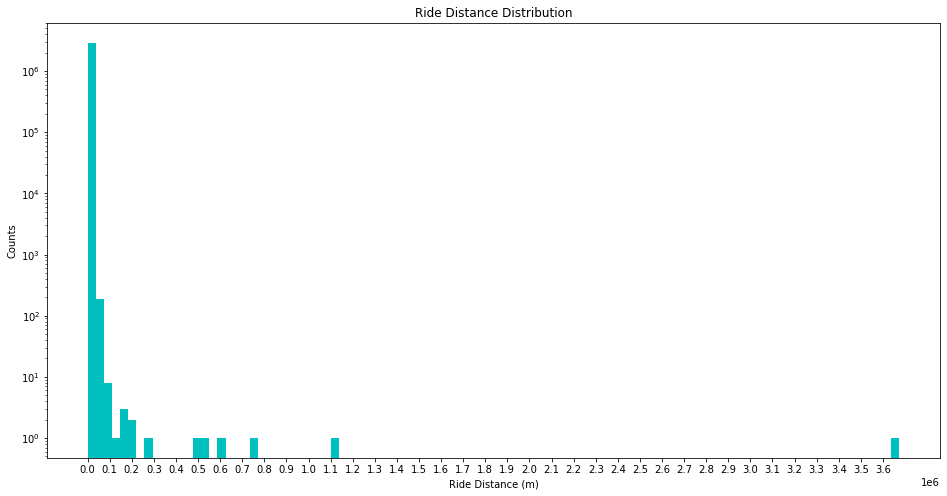

In [66]:
plt.figure(figsize = (16,8))
plt.title('Ride Distance Distribution')
plt.xlabel('Ride Distance (m)')
plt.ylabel('Counts')
plt.hist(mobiDF['Covered_distance_(m)'], color = 'c', log = True, bins = 100)
plt.xticks(range(0,int(max(mobiDF['Covered_distance_(m)'])),100000))
plt.show

In [52]:
q99 = mobiDF['Covered_distance_(m)'].quantile(0.99)
indexNames = mobiDF[mobiDF['Covered_distance_(m)'] > q99].index
mobiDF.drop(indexNames, inplace = True)

<function matplotlib.pyplot.show(close=None, block=None)>

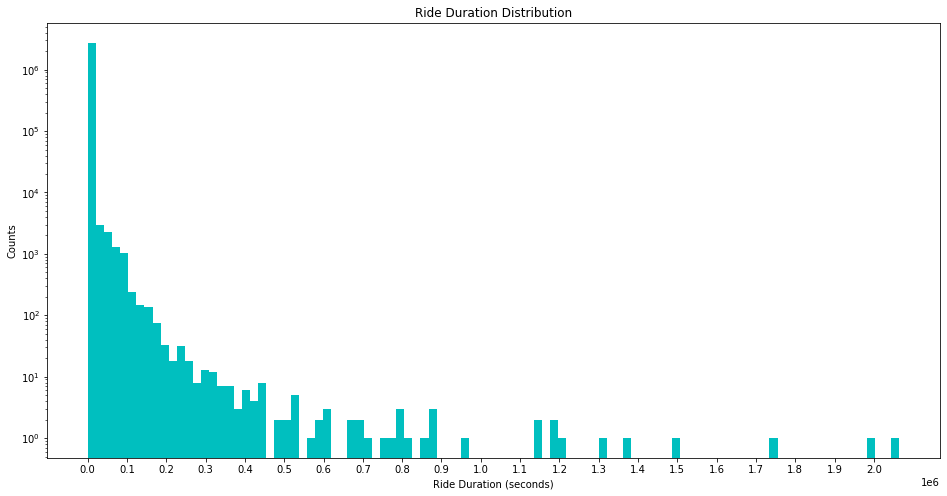

In [54]:
plt.figure(figsize = (16,8))
plt.title('Ride Duration Distribution')
plt.xlabel('Ride Duration (seconds)')
plt.ylabel('Counts')
plt.hist(mobiDF['Duration_(sec.)'], color = 'c', log = True, bins = 100)
plt.xticks(range(0,int(max(mobiDF['Duration_(sec.)'])),100000))
plt.show

In [56]:
q99 = mobiDF['Duration_(sec.)'].quantile(0.99)
indexNames = mobiDF[mobiDF['Covered_distance_(m)'] > q99].index
mobiDF.drop(indexNames, inplace = True)

4866.0

In [15]:
# mobiDF.to_csv('data/mobiSystemsDataMaster.csv', index = False)